In [10]:
%matplotlib inline
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd

In [12]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [21]:
# explore measurement class
first_m = session.query(Measurement).first()
first_m.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1118648d0>,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [24]:
# explore station class
first_s = session.query(Station).first()
first_s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x111890780>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'elevation': 3.0,
 'latitude': 21.2716,
 'id': 1}

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent


('2017-08-23')

In [34]:
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

year_of_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23')
year_of_data_df = pd.read_sql_query(year_of_data.statement, engine, index_col = "date")
year_of_data_df.head(10)


,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


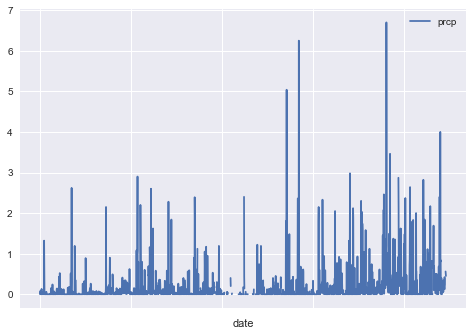

In [46]:
# Use Pandas Plotting with Matplotlib to plot the data
year_of_data_df.plot(rot = 45)
plt.show()

In [47]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_of_data_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [50]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).count()
station_count

9

In [53]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [82]:
# Choose the station with the highest number of temperature observations.
most_active_station = active_stations [0][0]
most_active_station

# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()

print(highest_temp, lowest_temp, avg_temp)


[(85.0,)] [(54.0,)] [(71.66378066378067,)]


In [93]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_temps = session.query(Measurement.tobs).\
filter(Measurement.date >= '2016-08-23', Measurement.station == most_active_station).all()


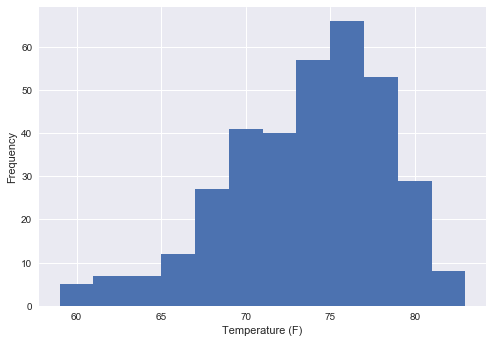

In [100]:
most_active_temps_df = pd.DataFrame(most_active_temps)
most_active_temps_df.head()

x = most_active_temps_df["tobs"]

plt.hist(x, bins=12)
plt.xlabel("Temperature (F)")
plt.ylabel('Frequency')
plt.show()